# Game of life

![](https://steamcdn-a.akamaihd.net/steam/apps/224700/header.jpg?t=1447356958)

![](https://www.researchgate.net/profile/Leonardo_Sanchez3/publication/314104345/figure/fig5/AS:466792264015877@1488303356730/Figura-6-Captura-de-un-planeador-en-life-juego-de-la-vida-de-Conway-1983-Tomado-de.png)

El juego de la vida es un juego de cero jugadores, lo que quiere que es un autómata celular (es un modelo matemático para un sistema dinámico que evoluciona en pasos discretos) que su evolución está determinada por el estado inicial y no necesita ninguna entrada de datos posterior, fue diseñado por el matemático británico [John Horton Conway](https://es.wikipedia.org/wiki/John_Horton_Conway) en 1970. 

![](https://static.urbantecno.com/2018/02/Este-es-John-Horton-Conway.jpg)

> Falleció el pasado sabado 11 de abril producto del [COVID-19](https://www.argentina.gob.ar/salud/coronavirus-COVID-19) a los 82 años.

## Referencias

()[https://pybonacci.org/2012/11/30/juego-de-la-vida-de-conway-con-python-usando-numpy/]
()[https://www.youtube.com/watch?v=omMcrvVGTMs]
()[https://bitstorm.org/gameoflife/]

## El juego

El "tablero de juego" es una malla plana formada por cuadrados (las "células") que se extiende por el infinito en todas las direcciones. Por tanto, cada célula tiene 8 células "vecinas", que son las que están próximas a ella, incluidas las diagonales. Las células tienen dos estados: están "vivas" o "muertas" (o "encendidas" y "apagadas"). El estado de las células evoluciona a lo largo de unidades de tiempo discretas (se podría decir que por turnos). El estado de todas las células se tiene en cuenta para calcular el estado de las mismas al turno siguiente. Todas las células se actualizan simultáneamente en cada turno, siguiendo estas reglas:

* El tablero cuadriculado que tienen dos posibles estados: **viva** (1) y **muerta** (0).
* Cada célula tiene ocho células vecinas (se cuentan también las de las diagonales).
* En cada paso, todas las células se actualizan instantáneamente teniendo en cuenta la siguiente regla:
    * Cada célula viva con 2 o 3 células vecinas vivas sobrevive.
    * Cada célula con 4 o más células vecinas vivas muere por superpoblación. 
    * Cada célula con 1 o ninguna célula vecina viva muere por soledad.
    * Cada célula muerta con 3 células vecinas vivas nace.
    
    Una célula muerta con exactamente 3 células vecinas vivas "nace" (es decir, al turno siguiente estará viva).
    Una célula viva con 2 o 3 células vecinas vivas sigue viva, en otro caso muere (por "soledad" o "superpoblación").

si las células permanecen vivas, mueren o generan nuevas células depende de cuántos de sus ocho vecinos estén vivos.

## Patrones
La vida tiene una variedad de patrones reconocidos que provienen de determinadas posiciones iniciales


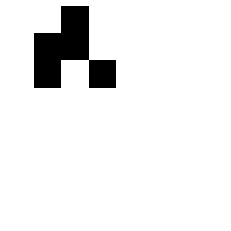

In [12]:
# coding: utf-8

"""Juego de la vida de Conway.
Autor: Juan Luis Cano <juanlu001@gmail.com>
El tablero es un array de NumPy, donde 0 significa célula muerta y 1 célula
viva. Se muestra una animación con matplotlib.
"""

from time import sleep

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation


def vecindario(b):
    """Array de células vivas en el vecindario."""
    vecindario = (
        np.roll(np.roll(b, 1, 1), 1, 0) +  # Abajo-derecha
        np.roll(b, 1, 0) +  # Abajo
        np.roll(np.roll(b, -1, 1), 1, 0) +  # Abajo-izquierda
        np.roll(b, -1, 1) +  # Izquierda
        np.roll(np.roll(b, -1, 1), -1, 0) +  # Arriba-izquierda
        np.roll(b, -1, 0) +  # Arriba
        np.roll(np.roll(b, 1, 1), -1, 0) +  # Arriba-derecha
        np.roll(b, 1, 1)  # Derecha
    )
    return vecindario


def paso(b):
    """Paso en el juego de la vida de Conway."""
    v = vecindario(b)
    buffer_b = b.copy()  # Hacemos una copia de la matriz
    for i in range(buffer_b.shape[0]):
        for j in range(buffer_b.shape[1]):
            if v[i, j] == 3 or (v[i, j] == 2 and buffer_b[i, j]):
                buffer_b[i, j] = 1
            else:
                buffer_b[i, j] = 0
    return buffer_b


# Parámetros del problema
GENERACIONES = 50
N = 8
M = 8

# Construimos el tablero
tablero = np.zeros((N, M), dtype=int)

# Añadimos una nave
tablero[1, 1:4] = 1
tablero[2, 1] = 1
tablero[3, 2] = 1

# Creamos la figura
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.axis('off')
b = tablero
imagen = ax.imshow(b, interpolation="none", cmap=cm.gray_r)


def animate(i):
    global b
    b = paso(b)
    imagen.set_data(b)
    return imagen,

anim = animation.FuncAnimation(fig, animate, frames=GENERACIONES, blit=True)
plt.show()